In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv")
print(data.head())
print(data['btc_market_price'][1023])

        Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                    

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


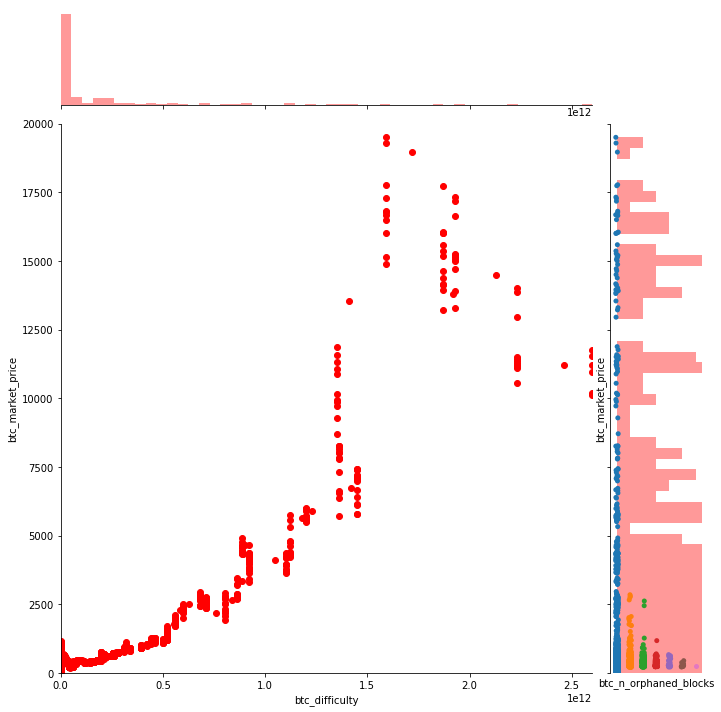

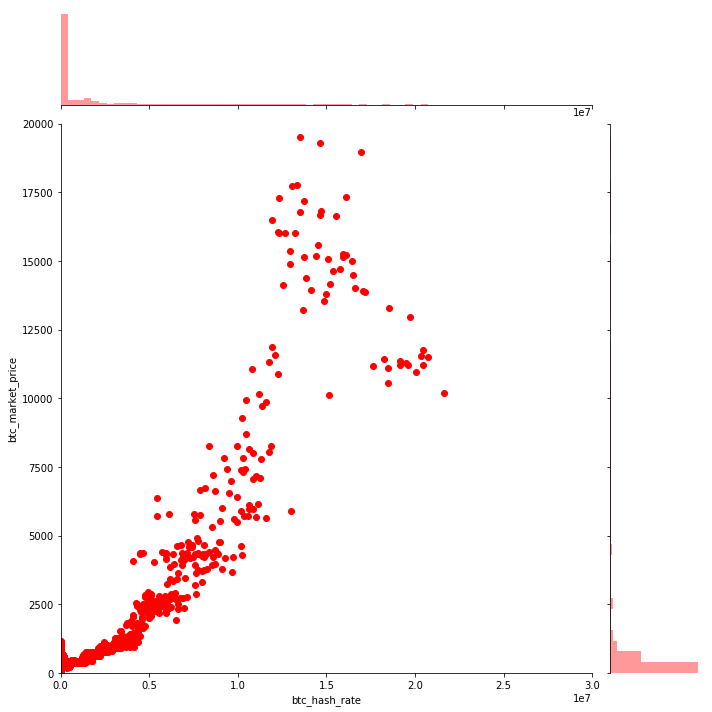

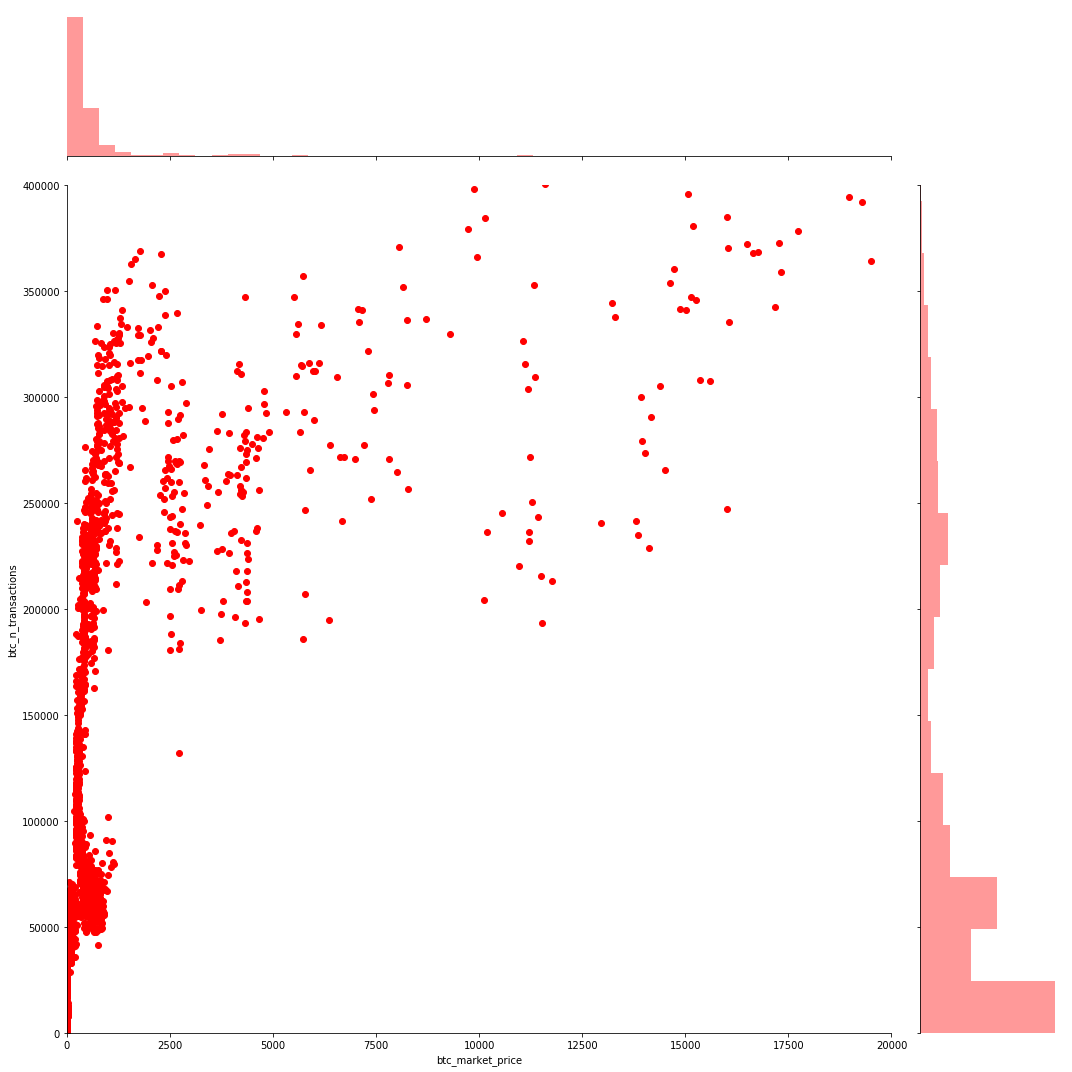

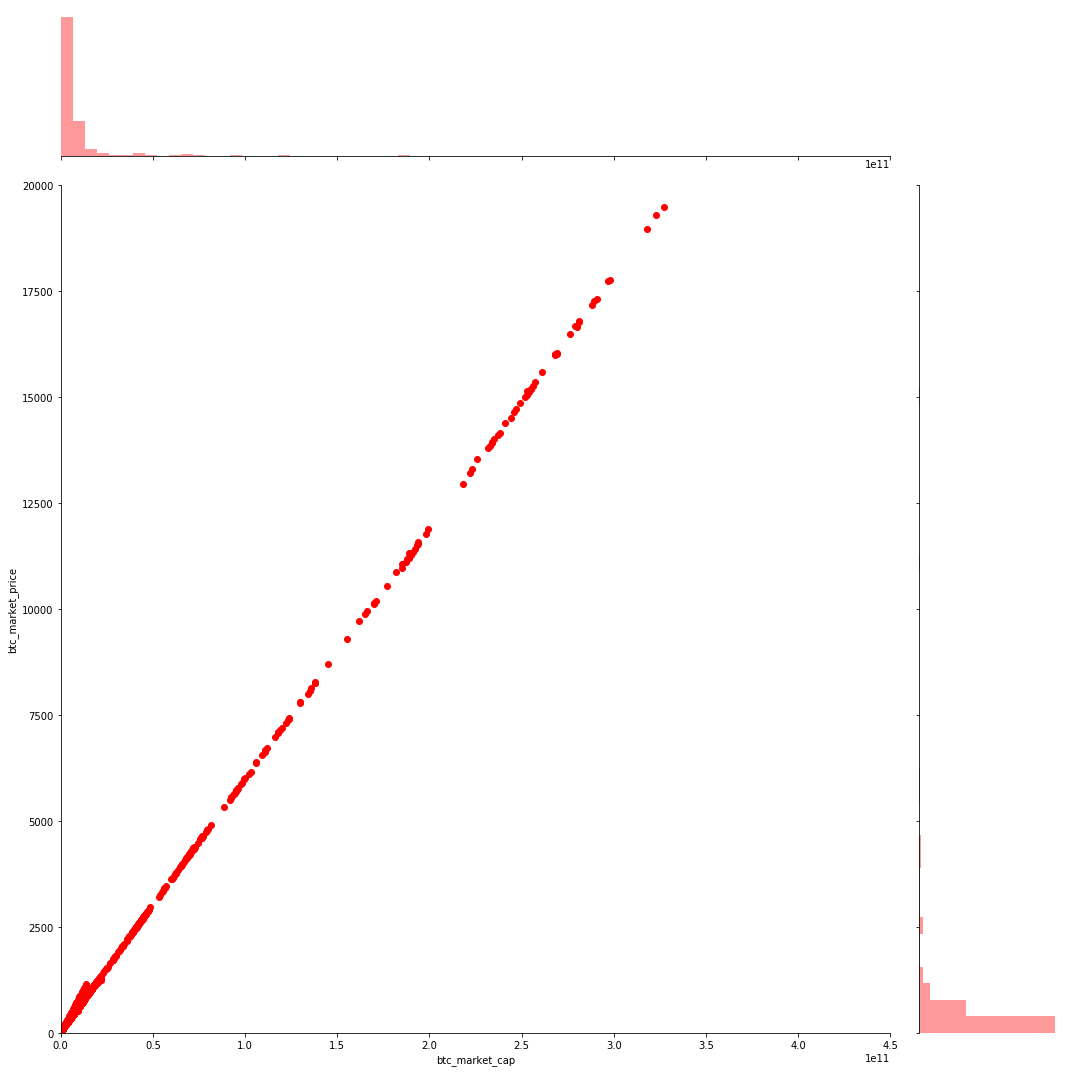

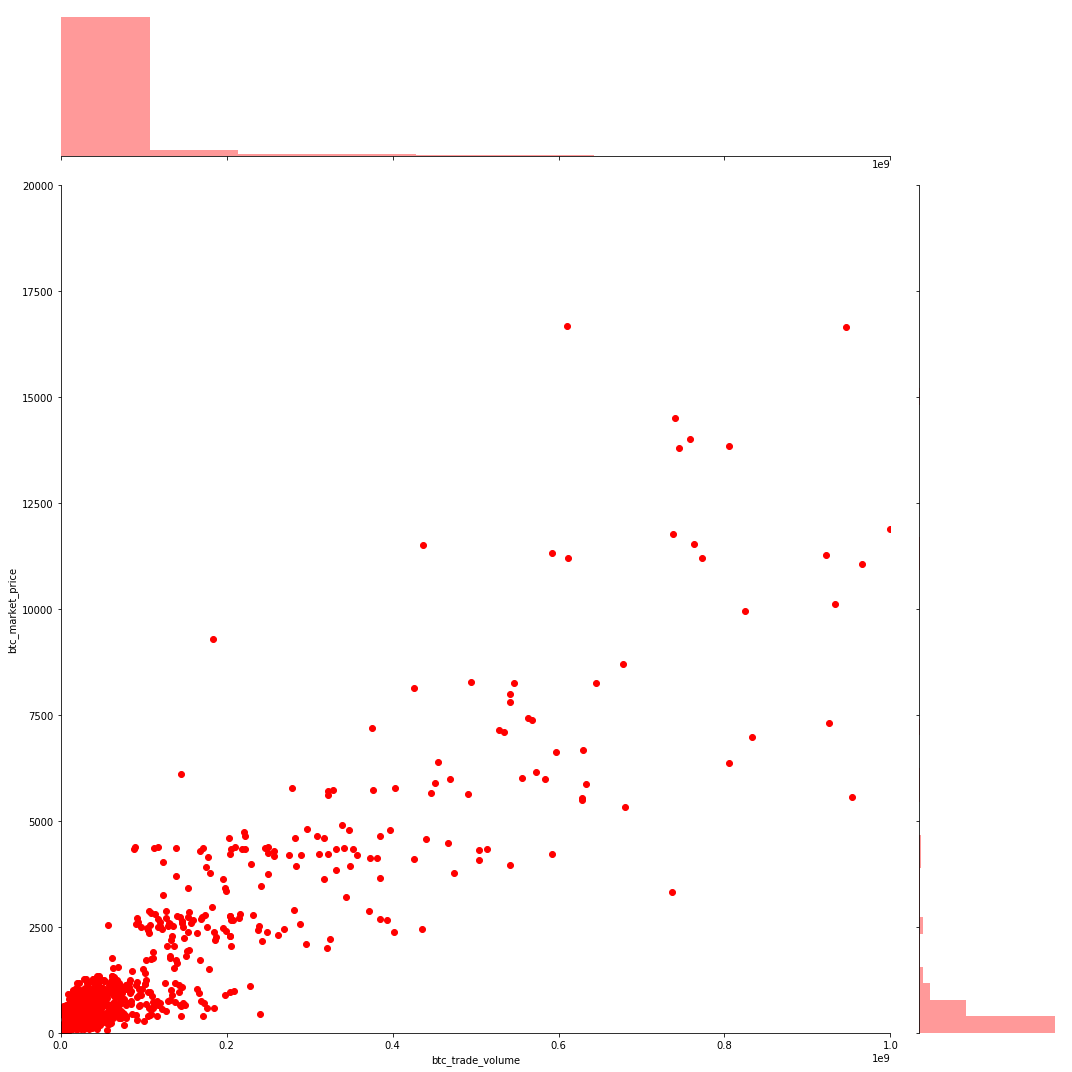

In [3]:
g = sns.jointplot( "btc_difficulty", "btc_market_price", data=data, xlim=(0, 2.6E+12), ylim=(0, 20000), color="r", size=10)
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)
a = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)
b = sns.jointplot("btc_n_transactions","btc_market_price", data=data, ylim=(0, 400000), xlim=(0, 20000), color="r", size=15)
c = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)
d = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

In [4]:
print(data['btc_trade_volume'].isnull().values.any())

data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)


True


In [5]:
data['btc_trade_volume'].isnull().values.any()

False

In [7]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [8]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.6143291783844


In [12]:
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.088237360951
The price on 2 february is 8899.085658396369
The price on 3 february is 9119.843047954504
The price on 4 february is 8466.687255805817
The price on 5 february is 6800.75379283026
The price on 6 february is 7625.499113954439
The price on 7 february is 8072.405387703879
The price on 8 february is 8259.81036927085
The price on 9 february is 8557.971719996789
The price on 10 february is 8334.015253654727
The price on 11 february is 8425.712247319372
The price on 12 february is 8836.588495896354
The price on 13 february is 8623.849963361301
The price on 14 february is 9363.419948754266
